In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
from pktools import*

In [3]:
num_mocks = 1000
zbin = 1

testing = True # turn on if comparing to pre-computed covariances

In [4]:
# First massage the Pk data into a form we want
for gc in ['NGC', 'SGC']:
    basedir = '/global/cscratch1/sd/sfschen/boss_data_renorm/pk/'
    fn = 'ps1D_BOSS_DR12_%s_z%d_COMPnbar_TSC_700_700_700_400_renorm.dat'%(gc,zbin)

    pkdat = read_power(basedir+fn)
    pkdat = np.array([ pkdat['k_center'], pkdat['pk0'], pkdat['pk2']]).T

    np.savetxt(basedir + 'pk_%s_z%d.dat'%(gc,zbin), pkdat)

In [5]:
# Load NGC Pk Mocks:
gc = 'NGC'
pks_ngc = []

basedir = '/global/cscratch1/sd/sfschen/boss_data_renorm/mock_pks/pk_%s_z%d/'%(gc,zbin)
print(basedir)

for ii in range(num_mocks):
    fn = 'ps1D_patchy_%s_z%d_COMPnbar_TSC_V6C_%d_0.2_0.5_700_700_700_400_renorm.dat' %(gc,zbin,ii+1)
    pkstruct = read_power(basedir+fn)
    
    pks_ngc += [ np.concatenate((pkstruct['pk0'], pkstruct['pk2'])),  ]
    
pks_ngc = np.array(pks_ngc)

/global/cscratch1/sd/sfschen/boss_data_renorm/mock_pks/pk_NGC_z1/


In [6]:
# Load SGC Pk Mocks:
gc = 'SGC'
pks_sgc = []

basedir = '/global/cscratch1/sd/sfschen/boss_data_renorm/mock_pks/pk_%s_z%d/'%(gc,zbin)
print(basedir)

for ii in range(num_mocks):
    fn = 'ps1D_patchy_%s_z%d_COMPnbar_TSC_V6C_%d_0.2_0.5_700_700_700_400_renorm.dat' %(gc,zbin,ii+1)
    pkstruct = read_power(basedir+fn)
    
    pks_sgc += [ np.concatenate((pkstruct['pk0'], pkstruct['pk2'])),  ]
    
pks_sgc = np.array(pks_sgc)

/global/cscratch1/sd/sfschen/boss_data_renorm/mock_pks/pk_SGC_z1/


In [7]:
# Load xi mocks:
xis = []
basedir = '/global/cscratch1/sd/sfschen/boss_data_renorm/mock_xis/'

for ii in range(num_mocks):
    fn = 'patchy_%04d_bin%d.xi'%(ii+1,zbin)
    
    xidats = np.loadtxt(basedir + fn)
    
    xis += [ np.concatenate((xidats[:,1],xidats[:,2])), ]
    
xis = np.array(xis)

In [8]:
# The mocks and measurements don't have the same shape:
dats = np.loadtxt('./xi/dr12v5_bin%d.xi'%(zbin))
np.savetxt('./xi/z%d.xi'%(zbin), dats[dats[:,0]<=177.5,:])

(0.0, 90.0)

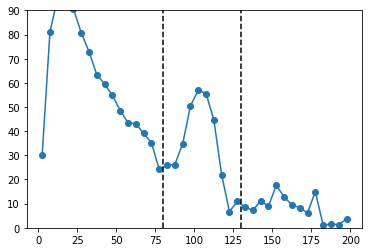

In [9]:
plt.plot(dats[:,0], dats[:,0]**2 * dats[:,1], 'o-')

plt.plot([80,80],[0,100],'k--')
plt.plot([130,130],[0,100],'k--')

plt.ylim(0,90)

In [10]:
# Now combine:
dats = np.hstack((pks_ngc,pks_sgc,xis))
cov_joint = np.cov(dats.T)
print(cov_joint.shape)
np.savetxt('covariances/cov_joint_NGCSGCXi_z%d.dat'%(zbin), cov_joint)

(232, 232)


In [11]:
# Some sanity checks: how correlated are we if we choose the right cuts?
krange = (pkstruct['k_center'] > 0.02) * (pkstruct['k_center'] < 0.2)
rrange = (xidats[:,0] > 80) * (xidats[:,1] < 130)
iis = np.concatenate( (krange, krange, krange, krange, rrange, rrange) )

cov_fit = cov_joint[np.ix_(iis,iis)]

In [12]:
sigmas = np.sqrt(np.diag(cov_fit))
corr_fit = cov_fit / sigmas[:,None] / sigmas[None,:]

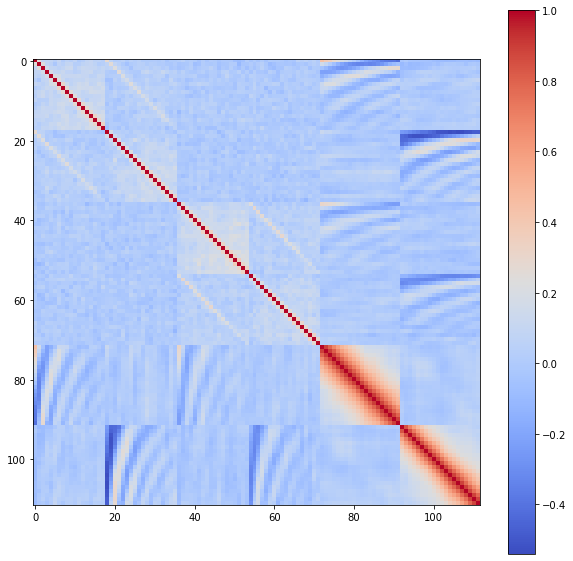

In [13]:
plt.figure(figsize=(10,10))

#plt.imshow(corr_fit, vmin=-1, vmax=1, cmap='bwr')
plt.imshow(corr_fit, cmap='coolwarm')
plt.colorbar()

In [14]:
# Sanity Check:
# The power spectra have been rescaled by:
#SGC z1: 0.8896282109744246
#SGC z3: 0.9016159434083929
#NGC z1: 0.9031526950112163
#NGC z3: 0.9103676930483875

cov_old = np.loadtxt('../boss_fixedb_bias/covariances/cov_joint_NGCSGCXi_z1.dat')

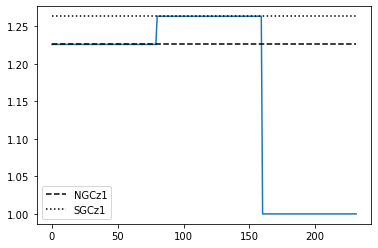

In [20]:
ii = np.arange( len(np.diag(cov_joint)) )
plt.plot(np.diag(cov_joint)/np.diag(cov_old))

plt.plot(ii, np.ones_like(ii) / 0.9031526950112163**2 ,'k--', label='NGCz1')
plt.plot(ii, np.ones_like(ii) / 0.8896282109744246**2 ,'k:', label='SGCz1')


plt.legend()